In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.layers import Input, Embedding, LSTM, GlobalMaxPool1D, Dense

In [5]:
from tensorflow.keras.models import Model

In [6]:
import pandas as pd

In [7]:
data = pd.read_excel('data.xlsx')

In [8]:
data1 = data.text

In [9]:
data2= data.result

In [10]:
dftrain, dftest, ytrain, ytest = train_test_split(data1, data2, test_size=0.2)

In [11]:
MaxVocabSize=20000

In [12]:
tokenizer = Tokenizer(num_words= MaxVocabSize)

In [13]:
tokenizer.fit_on_texts(dftrain)

In [14]:
seqtrain = tokenizer.texts_to_sequences(dftrain)

In [15]:
seqtest= tokenizer.texts_to_sequences(dftest)

In [16]:
word2idx = tokenizer.word_index

In [17]:
V = len(word2idx)

In [18]:
D,M = 20,15

In [19]:
datatrain = pad_sequences(seqtrain)

In [20]:
T = datatrain.shape[1]

In [21]:
datatest = pad_sequences(seqtest, maxlen= T)

In [22]:
i = Input(shape = (T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences= True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
r = model.fit(datatrain, ytrain, epochs = 80, validation_data=(datatest, ytest))

Epoch 1/80
1/1 [==============================] - 4s 4s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/80
1/1 [==============================] - 0s 40ms/step - loss: 0.6901 - accuracy: 0.7500 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/80
1/1 [==============================] - 0s 40ms/step - loss: 0.6873 - accuracy: 0.8125 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/80
1/1 [==============================] - 0s 40ms/step - loss: 0.6847 - accuracy: 0.8125 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/80
1/1 [==============================] - 0s 40ms/step - loss: 0.6822 - accuracy: 0.8125 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 6/80
1/1 [==============================] - 0s 40ms/step - loss: 0.6799 - accuracy: 0.8125 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 7/80
1/1 [==============================] - 0s 50ms/step - loss: 0.6776 - accuracy: 0.8125 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 8/80
1/1 [=============

1/1 [==============================] - 0s 40ms/step - loss: 0.4356 - accuracy: 0.8125 - val_loss: 0.8648 - val_accuracy: 0.5000
Epoch 60/80
1/1 [==============================] - 0s 40ms/step - loss: 0.4286 - accuracy: 0.8125 - val_loss: 0.8770 - val_accuracy: 0.5000
Epoch 61/80
1/1 [==============================] - 0s 40ms/step - loss: 0.4218 - accuracy: 0.8125 - val_loss: 0.8892 - val_accuracy: 0.5000
Epoch 62/80
1/1 [==============================] - 0s 40ms/step - loss: 0.4152 - accuracy: 0.8125 - val_loss: 0.9012 - val_accuracy: 0.5000
Epoch 63/80
1/1 [==============================] - 0s 40ms/step - loss: 0.4092 - accuracy: 0.8125 - val_loss: 0.9130 - val_accuracy: 0.5000
Epoch 64/80
1/1 [==============================] - 0s 40ms/step - loss: 0.4034 - accuracy: 0.8125 - val_loss: 0.9245 - val_accuracy: 0.5000
Epoch 65/80
1/1 [==============================] - 0s 40ms/step - loss: 0.3978 - accuracy: 0.8125 - val_loss: 0.9358 - val_accuracy: 0.5000
Epoch 66/80
1/1 [===============

In [25]:
import matplotlib.pyplot as plt

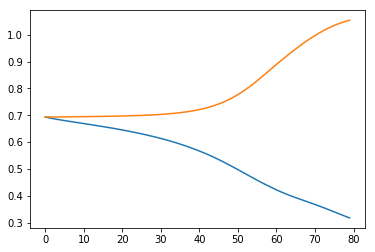

In [26]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])


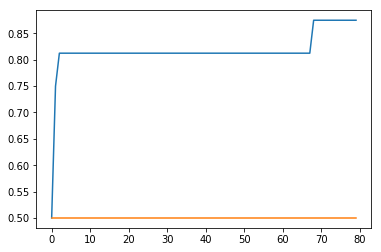

In [27]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

In [28]:
model.predict(datatest)

1/1 [==============================] - 1s 580ms/step


array([[0.8571276 ],
       [0.85504466],
       [0.85869145],
       [0.85546356]], dtype=float32)

In [44]:
datatest

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0, 64, 12,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 31],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17, 17],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 13, 12]])

In [47]:
seqtest

[[64, 12, 1], [31], [17, 17], [4, 13, 12]]